# Cartpole render (gym)

In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 22.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 23.8 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.9 MB/s eta 0:00:00 MB/s eta 0:00:01


In [1]:
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400, 900))
# display.start()


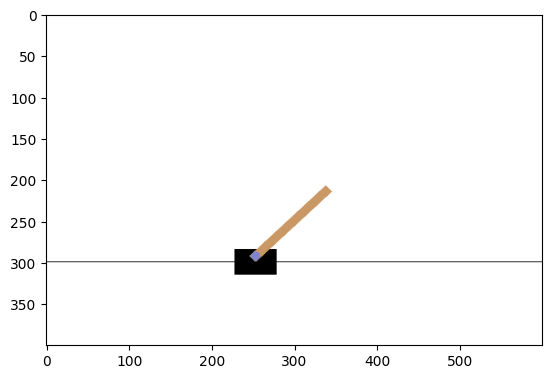

In [4]:
# REference: https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('CartPole-v0',render_mode='rgb_array')
env.reset()

for i in range(25):
   plt.imshow(env.render())
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()

# Mujoco Render

In [14]:
!export LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libGLEW.so:/usr/lib/x86_64-linux-gnu/libGL.so:/usr/lib/x86_64-linux-gnu/libGLdispatch.so.0
!unset LD_PRELOAD

In [16]:
# REference: https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('HalfCheetah-v2', render_mode="human")
env.reset()

for i in range(25):
   plt.imshow(env.render())
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()

Creating window glfw
GLFW error (code %d): %s 65543 b'GLX: Failed to create context: BadValue (integer parameter out of range for operation)'


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


GlfwError: Failed to create GLFW window

In [6]:
!export LD_PRELOAD=/usr/lib/x86_64-linux-gnu/libGLEW.so:/usr/lib/x86_64-linux-gnu/libGL.so:/usr/lib/x86_64-linux-gnu/libGLdispatch.so.0

In [3]:
import mujoco_py

In [4]:
 !MUJOCO_GL=egl

In [5]:
import gym
from gym.wrappers import RecordVideo

env = RecordVideo(gym.make("CartPole-v1"), "video")

o = env.reset()
for _ in range(100):
    # step() の中で、自動的にビデオ録画されるため、 render() を明示的に呼ぶ必要はない。
    o, r, d, _,_ = env.step(env.action_space.sample())
    if d:
        o = env.reset()

DependencyNotInstalled: MoviePy is not installed, run `pip install moviepy`

In [6]:
!pwd

/home/mario/github/metaworld/notebooks


In [7]:
import base64
import io
import gym
from gym.wrappers import RecordVideo
from IPython import display
from pyvirtualdisplay import Display

d = Display()
d.start()

env = RecordVideo(gym.make('CartPole-v1'),'./')

o = env.reset()

for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # 本当はDNNからアクションを入れる

    if d:
        env.reset()

for f in env.videos:
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))

ModuleNotFoundError: No module named 'pyvirtualdisplay'